# K-Nearest-Neighbors
KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting 
of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a
function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

# Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

# Problem statement

Dataset:
The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald 
Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 
Four features were measured from each sample: the length and the width of the sepals and petals.

Source: https://archive.ics.uci.edu/ml/datasets/Iris

Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.

# Question 1
Import libraries and load the dataset

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Pre-processing

# Question 2 - Estimating missing values
Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have 
to see how to replace those missing values with some estimated values (median)

In [63]:
from sklearn.impute import SimpleImputer
data=pd.read_csv("iris-1.csv")
print(data.isna().sum())


se=SimpleImputer(missing_values=np.nan,strategy="mean")
data.iloc[:, 0:5]=se.fit_transform(data.iloc[:,0:5])
data.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Question 3 - Dealing with categorical data
Change all the classes to numericals (0to2).

In [64]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Species"]=le.fit_transform(data["Species"])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             152 non-null    float64
 1   SepalLengthCm  152 non-null    float64
 2   SepalWidthCm   152 non-null    float64
 3   PetalLengthCm  152 non-null    float64
 4   PetalWidthCm   152 non-null    float64
 5   Species        152 non-null    int32  
dtypes: float64(5), int32(1)
memory usage: 6.7 KB


# Question 4
Observe the association of each independent variable with target variable and drop variables from feature set having correlation 
in range -0.1 to 0.1 with target variable.

In [65]:
data.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.703344,-0.389905,0.865382,0.889288,0.942753
SepalLengthCm,0.703344,1.000000,-0.109368,0.871741,0.816256,0.775490
SepalWidthCm,-0.389905,-0.109368,1.000000,-0.420516,-0.355808,-0.415367
PetalLengthCm,0.865382,0.871741,-0.420516,1.000000,0.960771,0.939813
PetalWidthCm,0.889288,0.816256,-0.355808,0.960771,1.000000,0.951545
Species,0.942753,0.775490,-0.415367,0.939813,0.951545,1.000000


# Question 5
Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). 
They will be having almost no influence on the classification.

In [66]:
data.var()

Id               1938.000000
SepalLengthCm       0.676633
SepalWidthCm        0.185514
PetalLengthCm       3.071945
PetalWidthCm        0.577079
Species             0.675322
dtype: float64

# Question 6
Plot the scatter matrix for all the variables.

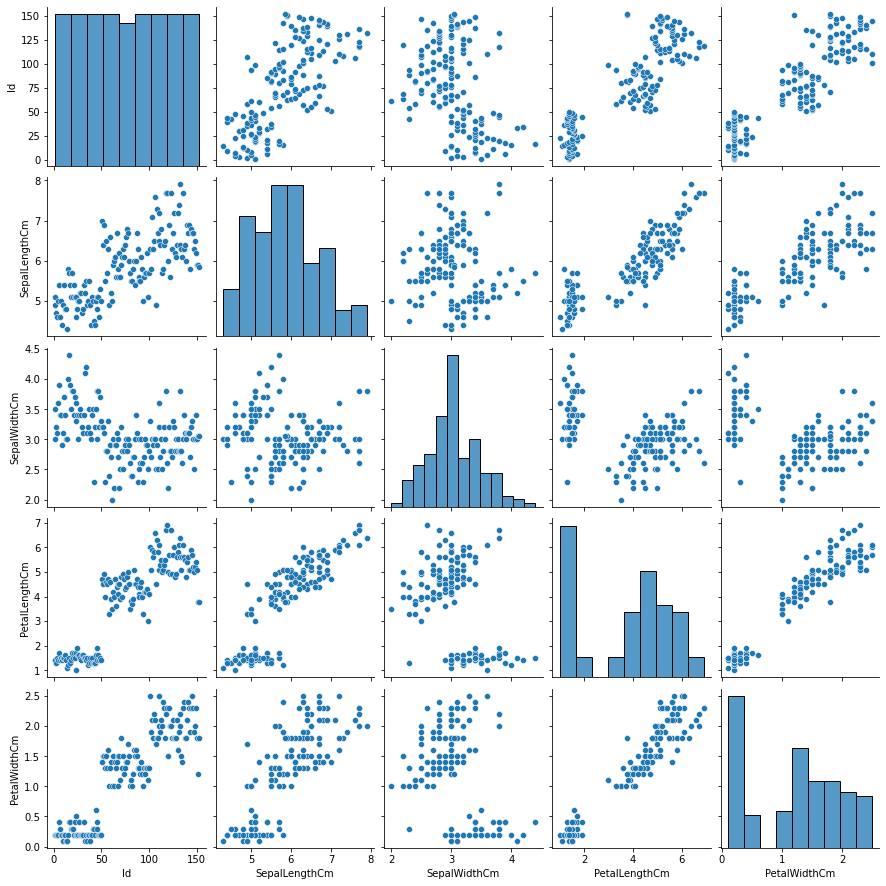

In [72]:
sns.pairplot(data.iloc[:,0:-1])

# Split the dataset into training and test sets

# Question 7
Split the dataset into training and test sets with 80-20 ratio.

In [86]:
X=data.drop(["Species","Id"],axis=1)
y=data["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
19,5.1,3.8,1.5,0.3
113,5.7,2.5,5.0,2.0
103,6.3,2.9,5.6,1.8
77,6.7,3.0,5.0,1.7
145,6.7,3.0,5.2,2.3
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


# Question 8 - Model
Build the model and train and test on training and test sets respectively using scikit-learn. Print the Accuracy of the model with different values of k=3,5,9.

Hint: For accuracy you can check accuracy_score() in scikit-learn

In [87]:
from sklearn.metrics import accuracy_score
k=[3,5,7]

for i in k:
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print("acuracy score",accuracy_score(y_test,y_pred),"\n")



acuracy score 1.0 

acuracy score 1.0 

acuracy score 0.967741935483871 



# Question 9 - Cross Validation
Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Mis 
classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the 
model with lowest MSE

In [96]:
k=[i for i in range(1,50)if i%2!=0]
score=[]
for j in k:
    model=KNeighborsClassifier(n_neighbors=j,metric="euclidean")
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))
    
MSE=[1-x for x in score]


[0.032258064516129004,
 0.0,
 0.0,
 0.032258064516129004,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.0,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004]

# Question 10
Plot misclassification error vs k (with k value on X-axis) using matplotlib.

In [101]:
len(k)

25